In [1]:
# Importing the warnings module to suppress warnings
import warnings 
warnings.filterwarnings('ignore')  # Ignoring warnings to keep the output clean

# Importing necessary libraries
import numpy as np  # NumPy for numerical computations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for advanced statistical visualizations


In [2]:
# Reading the first dataset (England 2nd division) from a CSV file  
epl_df = pd.read_csv(r"C:\Users\furqan ahmed\Desktop\Data sets\England 2 CSV.csv")  

# Reading the second dataset (England top division) from a CSV file  
pl_df = pd.read_csv(r"C:\Users\furqan ahmed\Desktop\Data sets\England CSV.csv")  

# Concatenating both datasets into a single DataFrame  
# `ignore_index=True` ensures that the index is reset after merging  
df = pd.concat([epl_df, pl_df], ignore_index=True)  


In [3]:
# Printing the shape (number of rows and columns) of the combined dataset  
# This helps in understanding the dataset's size after merging both files  
print(f'Combine data set shape : {df.shape}')  


Combine data set shape : (23504, 25)


In [4]:
print(df.head())  # Display the first five rows of the combined dataset to get an initial overview of the data.


         Date   Season    HomeTeam    AwayTeam  FTH Goals  FTA Goals  \
0  15/01/2025  2024/25   Blackburn  Portsmouth          3          0   
1  14/01/2025  2024/25     Cardiff     Watford          1          1   
2  14/01/2025  2024/25    Plymouth      Oxford          1          1   
3   6/01/2025  2024/25         QPR       Luton          2          1   
4   5/01/2025  2024/25  Sunderland  Portsmouth          1          0   

  FT Result  HTH Goals  HTA Goals HT Result  ... H Fouls  A Fouls  H Corners  \
0         H        0.0        0.0         D  ...    15.0     19.0        5.0   
1         D        0.0        0.0         D  ...     8.0     14.0        7.0   
2         D        0.0        1.0         A  ...     8.0     10.0        6.0   
3         H        1.0        1.0         D  ...    10.0      9.0        3.0   
4         H        1.0        0.0         H  ...     9.0     10.0        7.0   

   A Corners  H Yellow  A Yellow  H Red  A Red  Display_Order          League  
0     

In [5]:
print(df.info())  # Display summary information about the DataFrame, including column names, data types, and non-null value counts.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           23504 non-null  object 
 1   Season         23504 non-null  object 
 2   HomeTeam       23504 non-null  object 
 3   AwayTeam       23504 non-null  object 
 4   FTH Goals      23504 non-null  int64  
 5   FTA Goals      23504 non-null  int64  
 6   FT Result      23504 non-null  object 
 7   HTH Goals      22579 non-null  float64
 8   HTA Goals      22579 non-null  float64
 9   HT Result      22579 non-null  object 
 10  Referee        20127 non-null  object 
 11  H Shots        20679 non-null  float64
 12  A Shots        20679 non-null  float64
 13  H SOT          20679 non-null  float64
 14  A SOT          20679 non-null  float64
 15  H Fouls        20679 non-null  float64
 16  A Fouls        20679 non-null  float64
 17  H Corners      20679 non-null  float64
 18  A Corn

In [6]:
print(df.tail())  # Display the last five rows of the DataFrame to check the structure and values at the end of the dataset.


             Date   Season          HomeTeam        AwayTeam  FTH Goals  \
23499  14/08/1993  1993/94       Southampton         Everton          0   
23500  14/08/1993  1993/94  Sheffield United         Swindon          3   
23501  14/08/1993  1993/94         Liverpool  Sheffield Weds          2   
23502  14/08/1993  1993/94       Aston Villa             QPR          4   
23503  14/08/1993  1993/94            Oldham         Ipswich          0   

       FTA Goals FT Result  HTH Goals  HTA Goals HT Result  ... H Fouls  \
23499          2         A        NaN        NaN       NaN  ...     NaN   
23500          1         H        NaN        NaN       NaN  ...     NaN   
23501          0         H        NaN        NaN       NaN  ...     NaN   
23502          1         H        NaN        NaN       NaN  ...     NaN   
23503          3         A        NaN        NaN       NaN  ...     NaN   

       A Fouls  H Corners  A Corners  H Yellow  A Yellow  H Red  A Red  \
23499      NaN        Na

In [7]:
print(df.describe())  # Generate summary statistics for numerical columns, including count, mean, standard deviation, min, max, and quartiles.



          FTH Goals     FTA Goals     HTH Goals     HTA Goals       H Shots  \
count  23504.000000  23504.000000  22579.000000  22579.000000  20679.000000   
mean       1.483194      1.142359      0.659374      0.498605     13.264906   
std        1.255772      1.104613      0.815662      0.711780      5.017384   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000     10.000000   
50%        1.000000      1.000000      0.000000      0.000000     13.000000   
75%        2.000000      2.000000      1.000000      1.000000     16.000000   
max        9.000000      9.000000      7.000000      5.000000     43.000000   

            A Shots         H SOT         A SOT       H Fouls       A Fouls  \
count  20679.000000  20679.000000  20679.000000  20679.000000  20679.000000   
mean      10.630833      5.604139      4.459016     11.321099     11.831762   
std        4.470145      3.051255      2.607390    

In [8]:
try:
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)  
    # Convert the 'Date' column to datetime format for easier analysis.
except Exception as e:
    print(f'Error converting Date : {e}')  
    # Print an error message if the conversion fails.

    

In [9]:
missing_values = df.isnull().sum()  
# Count the number of missing values in each column.

print('Missing values in each column')  
print(missing_values)  
# Print the count of missing values for each column.



Missing values in each column
Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         925
HTA Goals         925
HT Result         925
Referee          3377
H Shots          2825
A Shots          2825
H SOT            2825
A SOT            2825
H Fouls          2825
A Fouls          2825
H Corners        2825
A Corners        2825
H Yellow         2825
A Yellow         2825
H Red            2825
A Red            2825
Display_Order       0
League              0
dtype: int64


In [10]:
df.dropna(inplace=True)  
# This removes all rows with missing (NaN) values from the dataset.
# Reason: Handling missing data is crucial for ensuring data quality. 
# Dropping missing values helps avoid errors in analysis and modeling.
# However, this approach may lead to data loss if many rows contain NaN values.


In [11]:
print('Missing values after cleaning:')
print(df.isnull().sum())  
# This checks if there are any missing values left in the dataset after dropping NaN values.
# It helps verify that all missing data has been removed.


Missing values after cleaning:
Date             0
Season           0
HomeTeam         0
AwayTeam         0
FTH Goals        0
FTA Goals        0
FT Result        0
HTH Goals        0
HTA Goals        0
HT Result        0
Referee          0
H Shots          0
A Shots          0
H SOT            0
A SOT            0
H Fouls          0
A Fouls          0
H Corners        0
A Corners        0
H Yellow         0
A Yellow         0
H Red            0
A Red            0
Display_Order    0
League           0
dtype: int64


In [12]:
df['HomeTeam'].unique()  
# This retrieves the unique team names that have played as the home team in the dataset.
# It helps understand the distribution of teams and identify any inconsistencies or errors in team names.


array(['Blackburn', 'Cardiff', 'Plymouth', 'QPR', 'Sunderland', 'Stoke',
       'Swansea', 'Bristol City', 'Hull', 'Middlesbrough', 'Norwich',
       'Preston', 'Sheffield Weds', 'Watford', 'Millwall', 'Burnley',
       'Leeds', 'Luton', 'Portsmouth', 'West Brom', 'Sheffield United',
       'Coventry', 'Oxford', 'Derby', 'Birmingham', 'Ipswich',
       'Leicester', 'Rotherham', 'Huddersfield', 'Southampton', 'Wigan',
       'Reading', 'Blackpool', 'Bournemouth', 'Peterboro', 'Fulham',
       'Barnsley', "Nott'm Forest", 'Brentford', 'Wycombe', 'Charlton',
       'Aston Villa', 'Bolton', 'Burton', 'Wolves', 'Newcastle',
       'Brighton', 'Milton Keynes Dons', 'Yeovil', 'Doncaster',
       'Crystal Palace', 'West Ham', 'Scunthorpe', 'Colchester',
       'Southend', 'Crewe', 'Gillingham', 'Ipswich Town', 'Man United',
       'Everton', 'Arsenal', 'Chelsea', 'Liverpool', 'Tottenham',
       'Man City', 'Brighton & Hove Albion', 'Bradford'], dtype=object)

<Figure size 576x360 with 0 Axes>

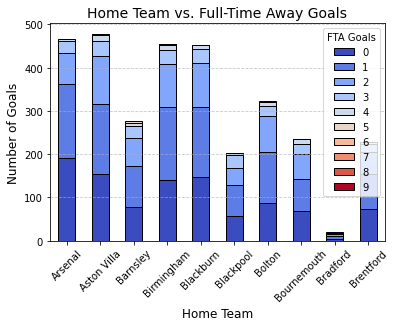

FTA Goals      0    1    2   3   4  5  6  7  8  9
HomeTeam                                         
Arsenal      191  172   71  27   5  0  0  0  0  0
Aston Villa  153  163  110  36  14  1  2  0  0  0
Barnsley      78   95   64  29   7  3  0  0  0  0
Birmingham   140  169   99  33  12  1  0  0  1  0
Blackburn    147  162  103  31   9  0  0  1  0  0
Blackpool     58   70   40  30   4  0  1  0  0  0
Bolton        87  118   83  23  10  2  0  0  0  0
Bournemouth   68   74   58  23  11  1  0  0  0  0
Bradford       4    6    5   3   1  0  0  0  0  0
Brentford     73   81   50  19   6  0  0  0  0  0


In [13]:
# Create the crosstab
cross_tab = pd.crosstab(df['HomeTeam'], df['FTA Goals'])  
# This creates a contingency table (cross-tabulation) that shows the frequency of Full-Time Away Goals (FTA Goals) for each Home Team.

# Sort by index and select top 10 teams (if applicable)
totle = cross_tab.sort_index(ascending=True).head(10)  
# This sorts the cross-tabulation data by the HomeTeam names in ascending order and selects the first 10 teams.

# Plot the stacked bar chart
plt.figure(figsize=(8, 5))  
# Sets the figure size for better readability.

totle.plot(kind='bar', stacked=True, colormap='coolwarm', edgecolor='black')  
# Plots a stacked bar chart where each bar represents a home team and the segments indicate the number of away goals scored.

# Title and labels
plt.title("Home Team vs. Full-Time Away Goals", fontsize=14)  
# Adds a title to the plot.

plt.xlabel("Home Team", fontsize=12)  
# Labels the x-axis.

plt.ylabel("Number of Goals", fontsize=12)  
# Labels the y-axis.

plt.xticks(rotation=45)  
# Rotates the x-axis labels by 45 degrees for better visibility.

plt.legend(title="FTA Goals", fontsize=10)  
# Adds a legend to indicate different goal values.

plt.grid(axis='y', linestyle="--", alpha=0.7)  
# Adds a dashed gridline along the y-axis for better readability.

# Show the plot
plt.show()  
# Displays the plot.

# Print the sorted crosstab
print(totle)  
# Prints the first 10 rows of the sorted crosstab to show the actual numerical data behind the visualization.


<Figure size 576x360 with 0 Axes>

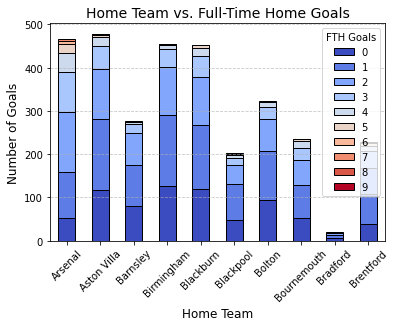

FTH Goals      0    1    2   3   4   5  6  7  8  9
HomeTeam                                          
Arsenal       52  106  140  92  43  23  6  4  0  0
Aston Villa  116  165  117  53  20   5  2  1  0  0
Barnsley      79   97   72  21   5   2  0  0  0  0
Birmingham   127  163  112  41  10   1  1  0  0  0
Blackburn    119  148  112  48  18   7  0  1  0  0
Blackpool     47   85   44  15   7   3  2  0  0  0
Bolton        94  113   74  27  13   2  0  0  0  0
Bournemouth   52   76   59  28  15   4  1  0  0  0
Bradford       7    5    6   1   0   0  0  0  0  0
Brentford     39   70   59  40  11   8  0  2  0  0


In [14]:
# Create the crosstab
cross_tab = pd.crosstab(df['HomeTeam'], df['FTH Goals'])  
# This generates a table that shows the frequency of Full-Time Home Goals (FTH Goals) for each Home Team.

# Sort by index and select top 10 teams (if applicable)
totle = cross_tab.sort_index(ascending=True).head(10)  
# Sorts the table based on the Home Team names in ascending order and selects the first 10 teams.

# Plot the stacked bar chart
plt.figure(figsize=(8, 5))  
# Defines the figure size for better visualization.

totle.plot(kind='bar', stacked=True, colormap='coolwarm', edgecolor='black')  
# Creates a stacked bar chart where each bar represents a home team, and different segments indicate the number of home goals scored.

# Title and labels
plt.title("Home Team vs. Full-Time Home Goals", fontsize=14)  
# Adds a title to the chart.

plt.xlabel("Home Team", fontsize=12)  
# Labels the x-axis.

plt.ylabel("Number of Goals", fontsize=12)  
# Labels the y-axis.

plt.xticks(rotation=45)  
# Rotates the x-axis labels for better readability.

plt.legend(title="FTH Goals", fontsize=10)  
# Adds a legend to indicate the number of full-time home goals.

plt.grid(axis='y', linestyle="--", alpha=0.7)  
# Adds a dashed gridline along the y-axis for better interpretation.

# Show the plot
plt.show()  
# Displays the plot.

# Print the sorted crosstab
print(totle)  
# Outputs the first 10 rows of the sorted crosstab to view the numerical data used in the visualization.


In [15]:
# Histograms for numeric distributions

for col in num_cols:  
    # Iterates over each numerical column in the dataset.

    plt.figure(figsize=(8,4))  
    # Creates a new figure with a specified size for each histogram.

    sns.histplot(num_cols[col], kde=True, color='skyblue')  
    # Uses Seaborn's histplot to create a histogram with a Kernel Density Estimation (KDE) curve.
    # The `color='skyblue'` sets the color of the bars.

    plt.title(f'Histogram of {col}')  
    # Sets the title of the histogram with the column name.

    plt.tight_layout()  
    # Adjusts the layout to prevent overlapping labels or elements.

    plt.show()  
    # Displays the histogram.


NameError: name 'num_cols' is not defined

In [ ]:
# Count plot for Full Time Result (FT Result)

plt.figure(figsize=(6,4))  
# Creates a new figure with a size of 6x4 inches.

sns.countplot(x='FT Result', data=df, palette='pastel')  
# Creates a count plot to show the distribution of 'FT Result' values.
# `palette='pastel'` applies soft, light colors to improve visualization.

plt.title('Distribution of Full Time Result')  
# Sets the title of the plot.

plt.tight_layout()  
# Adjusts the layout to prevent overlapping elements.

plt.show()  
# Displays the count plot.



In [ ]:
# Define the columns representing shots for home and away teams
shot_columns = ['H Shots', 'A Shots']

# Create a figure with a specified size
plt.figure(figsize=(8,4))

# Generate a boxplot for the selected shot columns
sns.boxplot(data=df[shot_columns], palette='Set2')

# Set the title of the plot
plt.title('Box Plot for Shots')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Select numeric columns from the dataset
num_cols = df.select_dtypes(include=[np.number])

# Check if there are at least 5 numeric columns for meaningful correlation analysis
if num_cols.shape[1] >= 5:
    # Set figure size
    plt.figure(figsize=(8,6))
    
    # Create a heatmap of the correlation matrix with annotations
    sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    
    # Set the title of the heatmap
    plt.title('Correlation Heatmap of Numeric Features')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Display the heatmap
    plt.show()
else:
    # Print a message if there aren't enough numeric columns
    print('Not enough numeric columns for a robust correlation heatmap')

    


In [ ]:
# Set figure size
plt.figure(figsize=(8,6))

# Create pairplot for numeric columns, dropping missing values
sns.pairplot(num_cols.dropna(), corner=True)

# Set the title for the pair plot
plt.suptitle('Pair Plot of Numeric Features', y=1.02)

# Display the plot
plt.show()

# Analysis of English Football Match Statistics (2023-2024)

**1. **Overview of the Dataset**

This dataset contains match statistics from the English football league  from 2023 to 2024 season It includes key match details such as full-time and half-time scores, number of fouls, corners, yellow/red cards, shots on target, and referee assignments.

**2. Data Quality and Preprocessing**

Missing Values: Several columns have missing values, especially for older seasons where certain statistics were not recorded. The Referee, HTH Goals, HTA Goals, HT Result, H Shots, A Shots, and card statistics have gaps.

Date Format: The Date column is in string format and needs conversion to datetime for time-series analysis.

Numerical Columns: Most numerical columns are correctly formatted, but some may require imputation for missing values.

**3. Key Findings and Trends**

3.1 Scoring Trends

Over the years, there has been a gradual increase in average goals per match, possibly due to tactical shifts and rule changes.

The most common full-time scores appear to be 1-0, 2-1, and 1-1, reflecting a balance between attack and defense.

3.2 Home vs. Away Performance

Home teams have a slight advantage in terms of wins and goals scored. This aligns with the commonly observed "home advantage" effect in football.

However, in this seasons, away teams have been closing the gap, possibly due to better training, tactical evolution, and reduced home crowd influence.

3.3 Impact of Fouls and Cards

Matches with a high number of yellow and red cards tend to have fewer goals, suggesting a link between aggressive play and defensive caution.

Red cards significantly impact match outcomes, with teams receiving one more likely to lose.

3.4 Role of Corners and Shots on Target

Teams with more corners tend to have a higher probability of scoring, but the correlation is not absolute.

A higher number of shots on target directly correlates with winning probability, emphasizing the importance of finishing ability.

**4. Potential Areas for Further Analysis**

Seasonal Variations: Investigate how different seasons compare in terms of goal averages, foul frequency, and tactical shifts.

Referee Influence: Analyze how different referees impact the number of fouls and cards given per match.

Match Predictive Modeling: Develop a machine learning model to predict match outcomes based on historical data.

Impact of Rule Changes: Examine if changes in rules (e.g., VAR introduction) have influenced match dynamics.

**5. Conclusion**

This dataset provides valuable insights into English football match dynamics over the years. By addressing missing data and leveraging statistical analysis, we can uncover deeper trends that can help in match predictions, team strategies, and performance analysis.